In [2]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Creating a dataframe
df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Drop the 'Cabin' column due to excessive missing values (too many NaNs)
if 'Cabin' in df.columns:
    df.drop(columns='Cabin', inplace=True)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
# Replace missing values in the 'Age' column with the mean age
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].mean(skipna=True))

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [12]:
# Fill missing values in 'Embarked' with the most common value (mode)
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

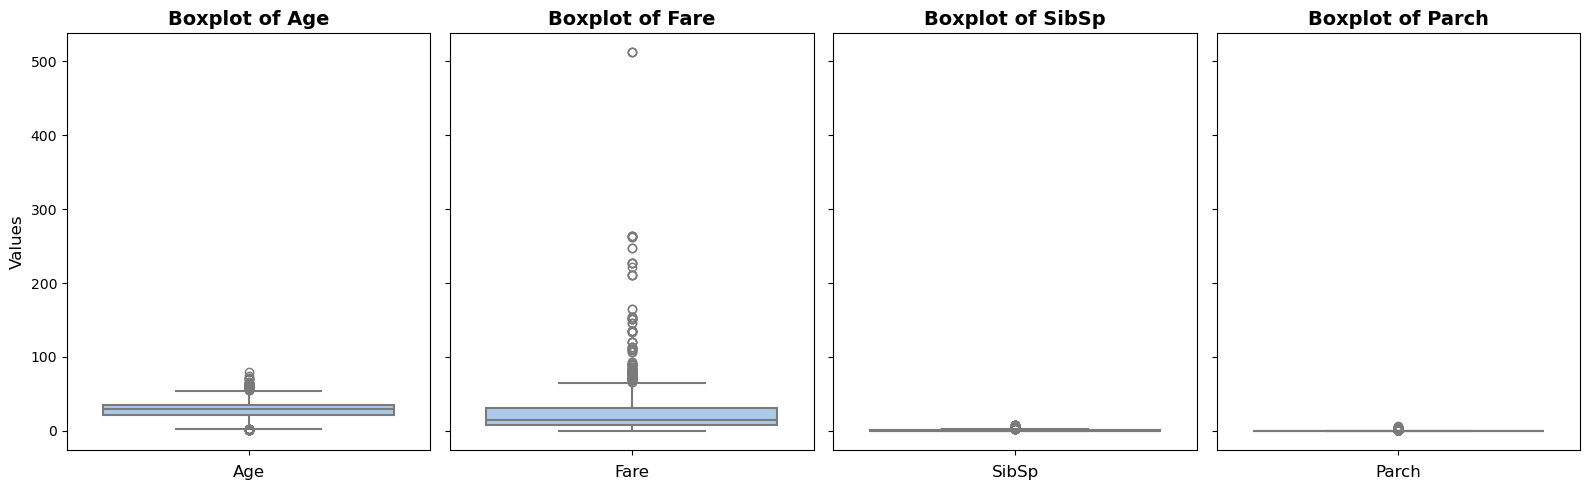

In [14]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Select numerical features for outlier detection
numerical_columns = ['Age', 'Fare', 'SibSp', 'Parch']

# Plot boxplots for each numerical feature
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(16, 5), sharey=True)

for i, col in enumerate(numerical_columns):
    sns.boxplot(y=df[col], ax=axes[i], palette= "pastel", linewidth=1.5)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14, weight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Values", fontsize=12 if i == 0 else 0)  # Label y-axis only for the first plot

plt.tight_layout()
plt.show()

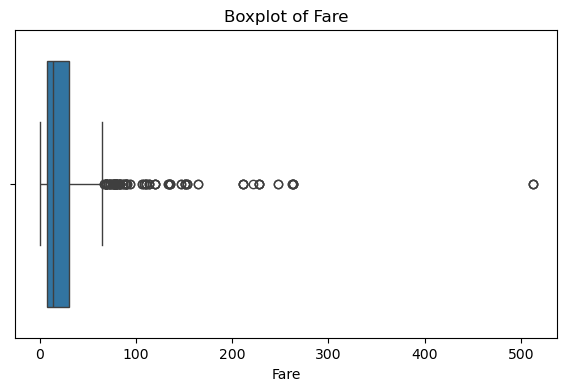

In [15]:
# Boxplot for 'Fare'
plt.figure(figsize=(7, 4))
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')
plt.show()

In [16]:
# IQR method
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]
print(outliers)

     PassengerId  Survived  Pclass  \
1              2         1       1   
27            28         0       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
..           ...       ...     ...   
846          847         0       3   
849          850         1       1   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name     Sex        Age  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
27                      Fortune, Mr. Charles Alexander    male  19.000000   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female  29.699118   
34                             Meyer, Mr. Edgar Joseph    male  28.000000   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.000000   
..                                                 ...     ...        ...   
846 

In [17]:
df['Fare'] = df['Fare'].clip(lower_bound, upper_bound)


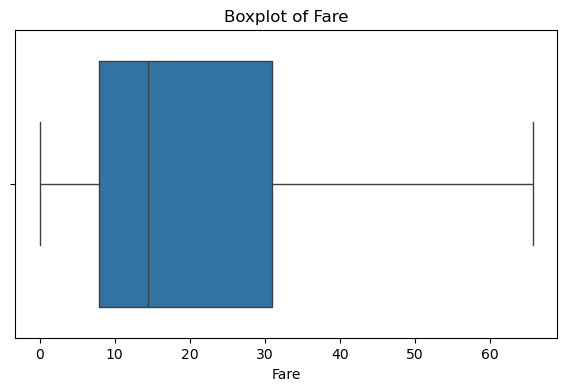

In [18]:
# Boxplot for 'Fare' after capping the outliers
plt.figure(figsize=(7, 4))
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')
plt.show()

In [19]:
print("Descriptive statistics for all columns: ")
df.describe()

Descriptive statistics for all columns: 


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,24.046813
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,20.481625
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,65.634400


In [20]:
# Count the number of survived and not-survived individuals
survival_counts = df['Survived'].value_counts()
print(survival_counts)

Survived
0    549
1    342
Name: count, dtype: int64


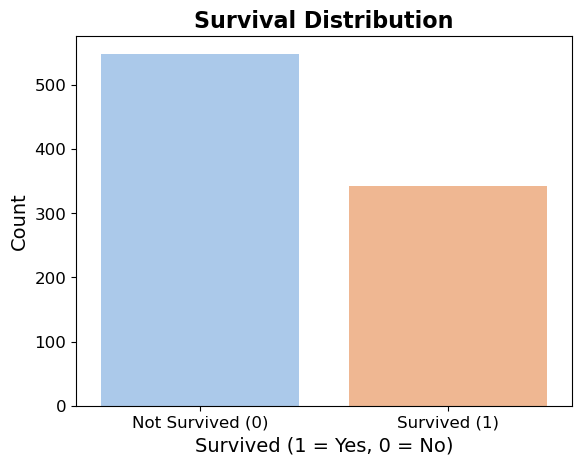

In [21]:
# Plot the survival distribution
sns.countplot(data=df, x='Survived', palette='pastel')
plt.title('Survival Distribution', fontsize=16, weight='bold')
plt.xlabel('Survived (1 = Yes, 0 = No)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['Not Survived (0)', 'Survived (1)'], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [22]:
# Count the number of male and female passengers
sex_counts = df['Sex'].value_counts()
print(sex_counts)

Sex
male      577
female    314
Name: count, dtype: int64


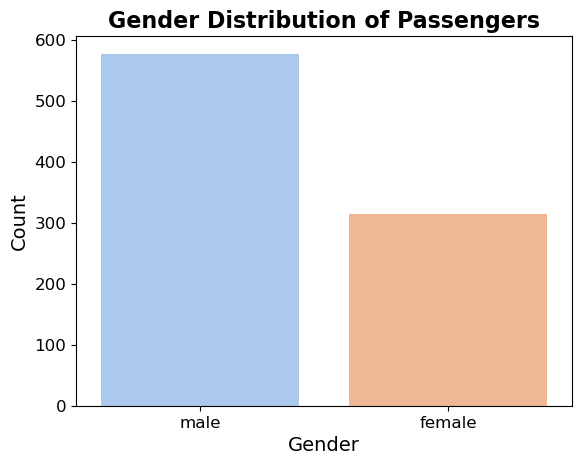

In [23]:
# Visualize the distribution of 'Sex' column
sns.countplot(data=df, x='Sex', palette='pastel')
plt.title('Gender Distribution of Passengers', fontsize=16, weight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

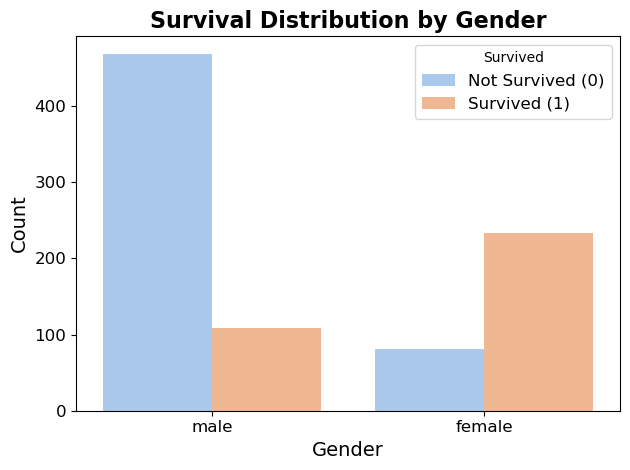

In [24]:
# Plot the survival distribution by gender (using hue to show survival status)
sns.countplot(x='Sex', hue='Survived', data=df, palette='pastel')

# Customize the plot
plt.title('Survival Distribution by Gender', fontsize=16, weight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Survived', labels=['Not Survived (0)', 'Survived (1)'], fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

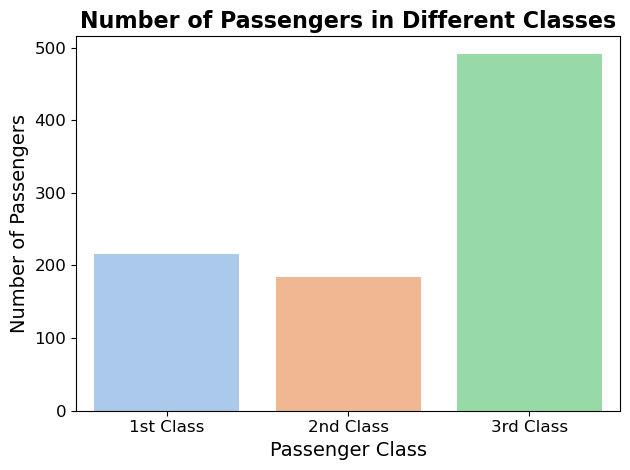

In [25]:
# Plot the number of passengers in different classes
sns.countplot(x='Pclass', data=df, palette='pastel')

# Customize the plot
plt.title('Number of Passengers in Different Classes', fontsize=16, weight='bold')
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'], fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

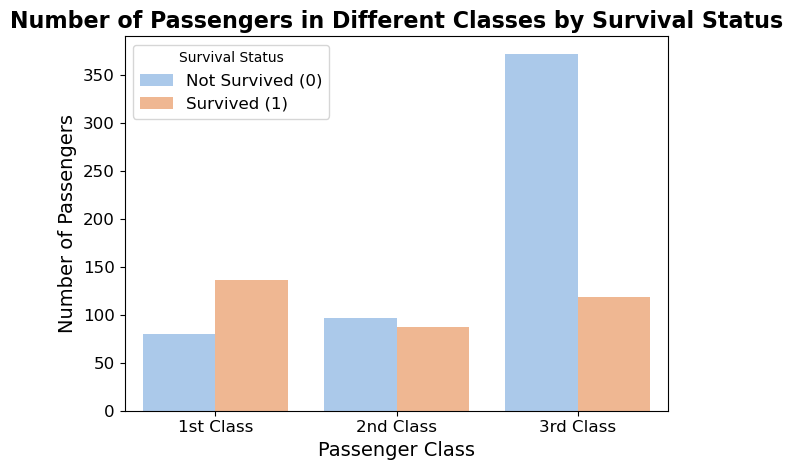

In [26]:
# Plot the number of passengers in different classes by survival status and gender
sns.countplot(x='Pclass', hue='Survived', data=df, palette='pastel')

# Customize the plot
plt.title('Number of Passengers in Different Classes by Survival Status', fontsize=16, weight='bold')
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'], fontsize=12)
plt.yticks(fontsize=12)

# Customize the legend
plt.legend(title='Survival Status', labels=['Not Survived (0)', 'Survived (1)'], fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

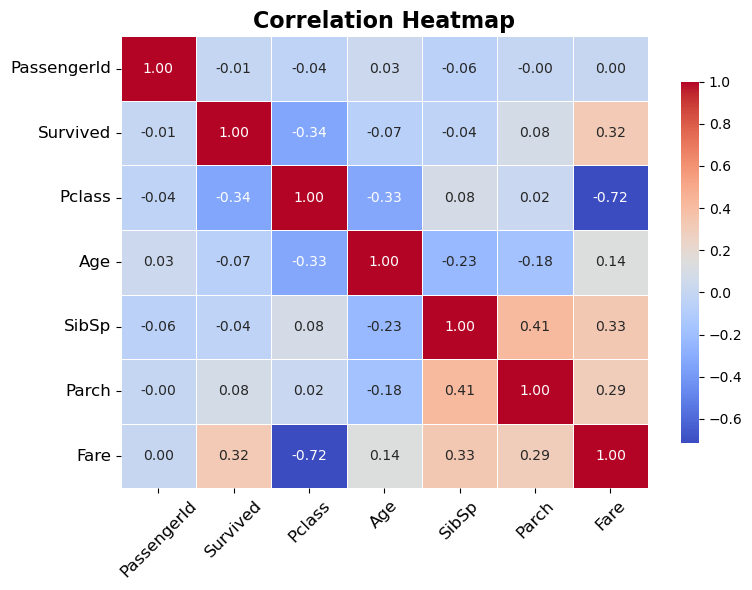

In [27]:
# Compute the correlation matrix for numerical features only
numerical_features = df.select_dtypes(include=np.number).columns # Select only numerical features
correlation_matrix = df[numerical_features].corr() #Calculate correlation for these features

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,          # Annotate the heatmap with correlation values
    fmt=".2f",           # Format numbers to 2 decimal places
    cmap="coolwarm",     # Color map
    linewidths=0.5,      # Add space between cells
    cbar_kws={'shrink': 0.8}  # Shrink the color bar slightly
)

# Customize the plot
plt.title("Correlation Heatmap", fontsize=16, weight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [28]:
# Display the counts of each category in 'Sex'
print(df['Sex'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


In [29]:
# Map 'male' to 0 and 'female' to 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [30]:
print(df['Sex'].head())

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64


In [31]:
# Count the number of passengers who embarked from each port
print(df['Embarked'].value_counts())
print("S: Southampton, C: Cherbourg, Q: Queenstown")

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64
S: Southampton, C: Cherbourg, Q: Queenstown


In [32]:
# Map 'S' to 0, 'C' to 1, and 'Q' to 2
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [33]:
print(df['Embarked'].head())

0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: int64


In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,65.6344,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [35]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [36]:
# Remove the 'Name' column as it's not relevant for survival prediction.
if 'Name' in df.columns:  # Check if 'Name' column exists before dropping
    df = df.drop(columns=['Name'])

In [37]:
# Remove the 'PassengerId' column as it's not relevant for survival prediction.
if 'PassengerId' in df.columns: # Check if 'PassengerId' column exists before dropping
    df = df.drop(columns=['PassengerId'])

In [38]:
# Remove the 'Ticket' column as it's not relevant for survival prediction.
if 'Ticket' in df.columns:  # Check if 'Ticket' column exists before dropping
    df = df.drop(columns=['Ticket'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [40]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_columns = ['Age', 'Fare']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the selected columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Check the scaled data
print(df[numerical_columns].head())

        Age      Fare
0 -0.592481 -0.820552
1  0.638789  2.031623
2 -0.284663 -0.787578
3  0.407926  1.419297
4  0.407926 -0.781471


In [41]:
# Check summary statistics to verify scaling
print(df[numerical_columns].describe())

                Age          Fare
count  8.910000e+02  8.910000e+02
mean   2.232906e-16  9.968332e-17
std    1.000562e+00  1.000562e+00
min   -2.253155e+00 -1.174727e+00
25%   -5.924806e-01 -7.882908e-01
50%    0.000000e+00 -4.686152e-01
75%    4.079260e-01  3.396748e-01
max    3.870872e+00  2.031623e+00


In [42]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop(columns=['Survived'])  # Features
y = df['Survived']  # Target

In [43]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_rf:.2f}")

Accuracy: 0.81


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       110
           1       0.77      0.72      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



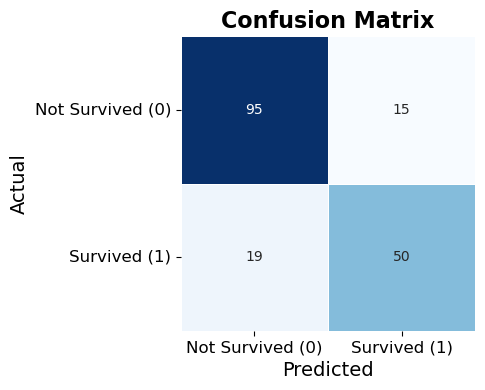

In [46]:
# Evaluate the Random Forest model's performance

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix as Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, square=True)
plt.title("Confusion Matrix", fontsize=16, weight='bold')
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=["Not Survived (0)", "Survived (1)"], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=["Not Survived (0)", "Survived (1)"], fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

In [47]:
from sklearn.tree import DecisionTreeClassifier

# Build the Decision Tree model
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate model performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

Decision Tree Accuracy: 0.80



Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[92 18]
 [18 51]]


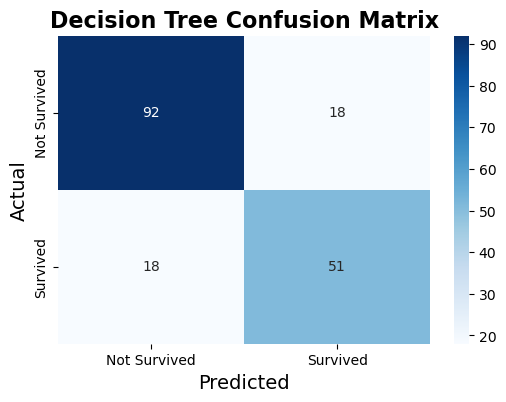

In [49]:
# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:\n", cm_dt)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.title("Decision Tree Confusion Matrix", fontsize=16, weight='bold')
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.show()

In [50]:
from sklearn.svm import SVC

# Build the SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)  # Default kernel is 'rbf'

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

In [51]:
# Evaluate model performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

SVM Accuracy: 0.83



Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       110
           1       0.83      0.70      0.76        69

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179


Confusion Matrix:
 [[100  10]
 [ 21  48]]


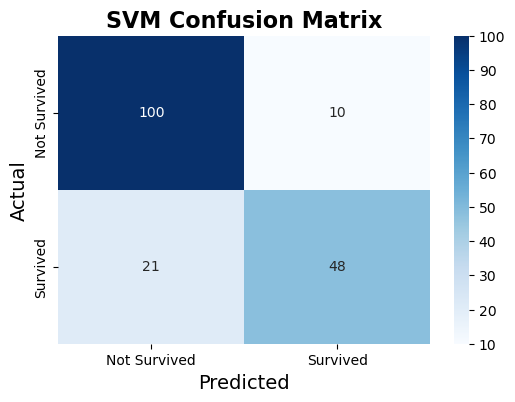

In [52]:
# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix:\n", cm_svm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.title("SVM Confusion Matrix", fontsize=16, weight='bold')
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.show()

In [53]:
from sklearn.neighbors import KNeighborsClassifier

# Build the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluate model performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

KNN Accuracy: 0.78



Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       110
           1       0.75      0.64      0.69        69

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.78      0.77       179


Confusion Matrix:
 [[95 15]
 [25 44]]


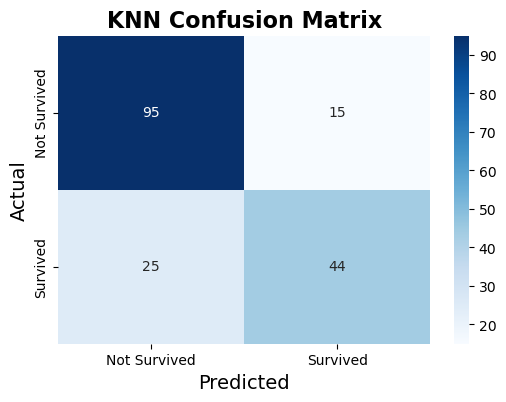

In [55]:
# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix:\n", cm_knn)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.title("KNN Confusion Matrix", fontsize=16, weight='bold')
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.show()

In [56]:
from sklearn.linear_model import LogisticRegression

# Build the Logistic Regression model
logreg_model = LogisticRegression(random_state=42, solver='liblinear')  # Using 'liblinear' solver for small datasets

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)

In [57]:
# Evaluate model performance
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")

Logistic Regression Accuracy: 0.79



Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.67      0.71        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179


Confusion Matrix:
 [[96 14]
 [23 46]]


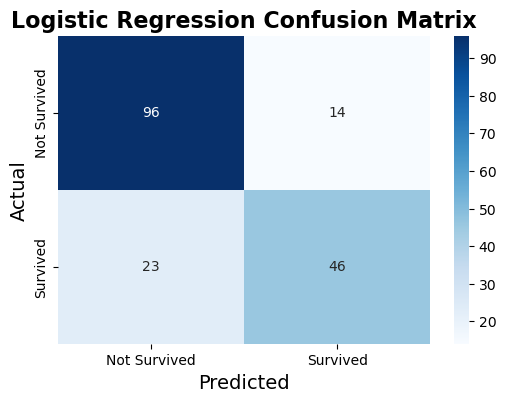

In [58]:
# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_logreg))

# Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print("\nConfusion Matrix:\n", cm_logreg)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.title("Logistic Regression Confusion Matrix", fontsize=16, weight='bold')
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.show()

Neural Network Accuracy: 0.80

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       110
           1       0.80      0.64      0.71        69

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179


Confusion Matrix:
 [[99 11]
 [25 44]]


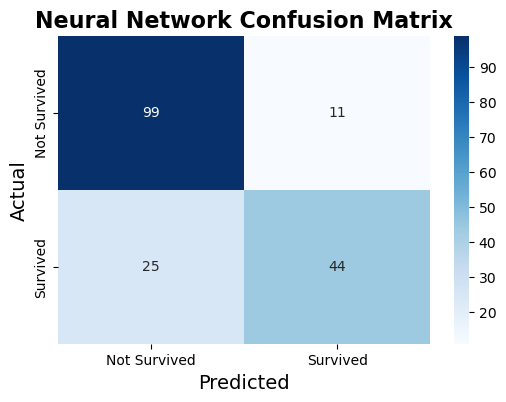

In [59]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Build the Neural Network (MLP) model
nn_model = MLPClassifier(hidden_layer_sizes=(100,), random_state=42, max_iter=1000)  # One hidden layer with 100 neurons
nn_model.fit(X_train, y_train)  # Train the model

# Make predictions on the test set
y_pred_nn = nn_model.predict(X_test)

# Evaluate model performance
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Accuracy: {accuracy_nn:.2f}")

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_nn))

# Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
print("\nConfusion Matrix:\n", cm_nn)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.title("Neural Network Confusion Matrix", fontsize=16, weight='bold')
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.show()

Bagging Accuracy: 0.81

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.71      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:
 [[96 14]
 [20 49]]


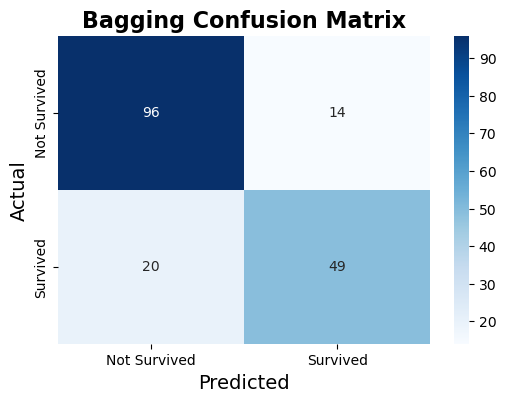

In [60]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Build the Bagging model using Decision Tree as base estimator
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

# Train the model
bagging_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate model performance
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Accuracy: {accuracy_bagging:.2f}")

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_bagging))

# Confusion Matrix
cm_bagging = confusion_matrix(y_test, y_pred_bagging)
print("\nConfusion Matrix:\n", cm_bagging)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_bagging, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.title("Bagging Confusion Matrix", fontsize=16, weight='bold')
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.show()

In [61]:
# Compare model accuracies
model_names = [
    "Logistic\nRegression",
    "K-Nearest\nNeighbors",
    "Support Vector\nMachine",
    "Decision\nTree",
    "Random Forest\nClassifier",
    "Neural\nNetwork",
    "Bagging\nModel",
]
model_scores = [
    accuracy_logreg,  # Logistic Regression
    accuracy_knn,  # K-Nearest Neighbors
    accuracy_svm,  # Support Vector Machine
    accuracy_dt,  # Decision Tree
    accuracy_rf,  # Random Forest
    accuracy_nn,  # Neural Network
    accuracy_bagging,  # Bagging Classifier Model
]

# Print the accuracies
print("Accuracies for the models: ")
for name, score in zip(model_names, model_scores):
    print(f"{name}: {score:.2f}")

Accuracies for the models: 
Logistic
Regression: 0.79
K-Nearest
Neighbors: 0.78
Support Vector
Machine: 0.83
Decision
Tree: 0.80
Random Forest
Classifier: 0.81
Neural
Network: 0.80
Bagging
Model: 0.81


In [ ]:
# Plot the accuracies
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(model_names, model_scores, color=['skyblue', 'lightgreen', 'lightcoral', 'plum', 'gold', 'lightpink', 'lightyellow'], edgecolor='black')

# Add accuracy values above bars
for bar, score in zip(bars, model_scores):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.01,
        f"{score:.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )

# Customize labels and title
ax.set_xlabel("Model", fontsize=12)
ax.set_ylabel("Accuracy", fontsize=12)
ax.set_title("Model Comparison", fontsize=14, pad=15)
ax.set_ylim(0, 1.1)  # Extend y-axis slightly for clarity

# Display the plot
plt.xticks()  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()